In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as py
import tensorflow as tf
import cv2

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten


In [107]:
picture_size=48
folder_path="C:\\Users\\lenovo\\Downloads\\"

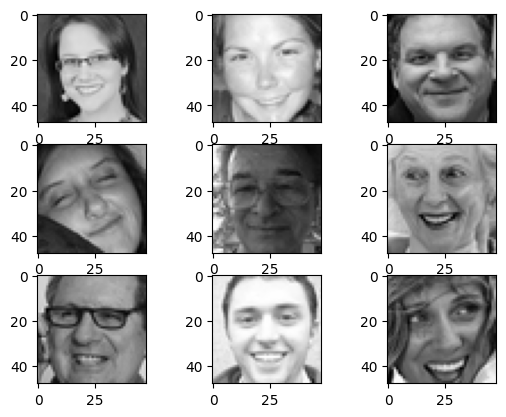

In [108]:
for i in range (1,10,1):
    plt.subplot(3,3,i)
    pic=cv2.imread(folder_path+"train\\happy\\im"+str(i-1)+".png")
    plt.imshow(pic)
    

In [109]:
batch_size=8
data_train=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
data_test=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_set=data_train.flow_from_directory(
        folder_path+"train",
        color_mode="grayscale",
        target_size=(picture_size, picture_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
test_set=data_test.flow_from_directory(
        folder_path+"test",
        color_mode="grayscale",
        target_size=(picture_size, picture_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 815 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [110]:
model=Sequential()

# fist CNN layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#second cnn layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# third cnn layer
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# fully connected fist layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

# second fully connected layer

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# final layer
model.add(Dense(4, activation="softmax"))


In [111]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,992,004 (19.04 MB)

 Trainable params: 4,992,004 (19.04 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
early_stopping=tf.keras.callbacks. EarlyStopping(
monitor="val_loss",
min_delta=0.0001,
patience=20,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=True,
)    

In [114]:
epochs=55

In [115]:
history=model.fit(train_set,
steps_per_epoch=train_set.n//train_set.batch_size,
epochs=epochs,
validation_data = test_set,
validation_steps = test_set.n//test_set.batch_size,
callbacks=early_stopping
)

model.save("emotionRecognition.h5")

Epoch 1/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.2334 - loss: 1.4300 - val_accuracy: 0.2472 - val_loss: 1.3842
Epoch 2/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: 0.6967 - val_accuracy: 0.3333 - val_loss: 0.6937
Epoch 3/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.2607 - loss: 1.3879 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 4/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 0.6985 - val_accuracy: 0.3333 - val_loss: 0.6914
Epoch 5/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.3069 - loss: 1.3872 - val_accuracy: 0.2694 - val_loss: 1.3861
Epoch 6/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: 0.7043 - val_accuracy: 0.3333 - val_loss: 0.6941
Epoch 7/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.2290 - loss: 1.3877 - val_accuracy: 0.2500 - val_loss: 1.3861
Epoch 8/55
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.3750 - loss: 0.6947 - val

In [116]:
test_loss, test_acc = model.evaluate(test_set)
print(test_acc)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5561 - loss: 1.1422
0.5234159827232361
